In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

In [2]:
panel = pd.read_csv("Final_Data_JC.csv")

In [6]:
panel.head()

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,game_id,team,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,2014_01_SF_DAL,SF,NaN,NaN,2014-09-07,Sunday,True,False,False,False
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,2014_02_CHI_SF,SF,NaN,NaN,2014-09-14,Sunday,True,False,False,False
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,2014_03_SF_ARI,SF,NaN,NaN,2014-09-21,Sunday,True,False,False,False
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,2014_04_PHI_SF,SF,NaN,NaN,2014-09-28,Sunday,True,False,False,False
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,2014_05_KC_SF,SF,NaN,NaN,2014-10-05,Sunday,True,False,False,False


In [3]:
import nflreadpy as nfl

rosters = nfl.load_rosters_weekly([i for i in range(2014, 2026)]).to_pandas()

In [4]:
rosters.head()

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
0,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
1,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
2,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
3,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
4,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None


In [18]:
rosters.columns

Index(['season', 'team', 'position', 'depth_chart_position', 'jersey_number',
       'status', 'full_name', 'first_name', 'last_name', 'birth_date',
       'height', 'weight', 'college', 'gsis_id', 'espn_id', 'sportradar_id',
       'yahoo_id', 'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id',
       'sleeper_id', 'years_exp', 'headshot_url', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name', 'esb_id',
       'gsis_it_id', 'smart_id', 'entry_year', 'rookie_year', 'draft_club',
       'draft_number'],
      dtype='object')

In [12]:
rosters.loc[(rosters["first_name"] == "Phil") & (rosters["last_name"] == "Dawson")]

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
64062,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64064,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64065,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64066,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64067,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64070,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64071,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64072,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
64075,2016,SF,K,K,4,ACT,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
150406,2018,ARI,K,K,4,RES,Phil Dawson,Phil,Dawson,1975-01-23,...,REG,None,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None


In [20]:
check = panel.merge(
    rosters[["gsis_id", "season", "week", "status"]],
    how="left",
    on=["gsis_id", "season", "week"],
    indicator=True,
)

In [21]:
check._merge.value_counts()

_merge
both          222921
left_only        246
right_only         0
Name: count, dtype: int64

In [22]:
check.loc[check["_merge"] == "left_only"]

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge
262,262,00-0019546,NaN,NaN,NaN,NaN,2014.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,left_only
785,785,00-0020578,Matt Bryant,1975-05-29,69.0,203.0,2015.0,14.0,K,SPEC,...,right Quadricep,Out,NaN,NaN,False,True,True,True,NaN,left_only
945,945,00-0020972,Billy Cundiff,1980-03-30,73.0,212.0,2014.0,15.0,K,SPEC,...,right Knee,Questionable,NaN,NaN,False,True,True,True,NaN,left_only
1342,1342,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2015.0,16.0,QB,QB,...,left Shoulder,Out,NaN,NaN,False,True,True,True,NaN,left_only
1512,1512,00-0022017,NaN,NaN,NaN,NaN,2014.0,17.0,NaN,NaN,...,Shoulder,Out,NaN,NaN,False,True,True,True,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106549,104981,00-0032189,Tony Steward,1992-09-19,72.0,241.0,2015.0,14.0,LB,LB,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,left_only
107065,105497,00-0032205,NaN,NaN,NaN,NaN,2015.0,14.0,NaN,NaN,...,Knee,Out,NaN,NaN,False,True,True,True,NaN,left_only
109237,107669,00-0032265,Mario Edwards,1994-01-25,75.0,280.0,2015.0,16.0,NaN,NaN,...,Neck,Out,NaN,NaN,False,True,True,True,NaN,left_only
109523,107955,00-0032271,D'Joun Smith,1992-09-23,71.0,193.0,2015.0,2.0,CB,DB,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,left_only


In [24]:
rosters.loc[
    (rosters["last_name"] == "Romo")
    & (rosters["season"] == 2015)
    & (rosters["week"] == 16)
]

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number


In [ ]:
# just drop those 246 entries who had injury/other data but not roster data for now?
# note somewhere that we only our player-week panel only includes ppl who were on weekly rosters
final = check.loc[check["_merge"] == "both"]

In [ ]:
# just confirming that gsis_id is consistent across seasons
final.loc[(final["display_name"] == "Tony Romo")].sort_values(by="week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge
1317,1317,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,1.0,QB,QB,...,Back,Probable,2014-09-07,Sunday,True,True,True,False,ACT,both
1343,1343,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,1.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1335,1335,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2015.0,1.0,QB,QB,...,Back,Probable,2015-09-13,Sunday,True,True,True,False,RES,both
1318,1318,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,2.0,QB,QB,...,Back,Probable,2014-09-14,Sunday,True,True,True,False,ACT,both
1344,1344,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,2.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1336,1336,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2015.0,2.0,QB,QB,...,Back,Probable,2015-09-20,Sunday,True,True,True,False,RES,both
1319,1319,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,3.0,QB,QB,...,Back,Probable,2014-09-21,Sunday,True,True,True,False,ACT,both
1345,1345,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,3.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1320,1320,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,4.0,QB,QB,...,Back,Probable,2014-09-28,Sunday,True,True,True,False,ACT,both
1346,1346,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,4.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both


In [190]:
# create binary column for whether a given week is a return week (from injury) for a player
# using only the missed due to injury column for this because that already considers both injury report & snap count

final_sorted = final.sort_values(by=["gsis_id", "season", "week"])
final_sorted["is_return_week"] = (
    (final_sorted["missed_due_to_injury"] == False) & (final_sorted["played"])
) & (
    (
        final_sorted.groupby(by=["gsis_id", "season"])["missed_due_to_injury"].shift(
            fill_value=False
        )
    )
    | (
        final_sorted.groupby(by=["gsis_id", "season"])["played"].shift(fill_value=True)
        == False
    )
)

In [ ]:
# final_sorted = final.sort_values(by=["gsis_id", "season", "week"])
# final_sorted["is_return_week"] = (final_sorted["status"] == "ACT") & (
#     final_sorted.groupby(by=["gsis_id", "season"])["status"].shift(fill_value="ACT")
#     != "ACT"
# )

In [191]:
final_sorted["return_week"] = final_sorted["week"].where(final_sorted["is_return_week"])

In [192]:
final_sorted["return_week"] = final_sorted.groupby(by=["gsis_id", "season"])[
    "return_week"
].ffill()

In [193]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2021)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week
201180,199600,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,1.0,WR,WR,...,2021-09-12,Sunday,True,False,False,False,ACT,both,False,NaN
201181,199601,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,3.0,WR,WR,...,2021-09-26,Sunday,True,False,False,False,ACT,both,False,NaN
201182,199602,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,4.0,WR,WR,...,2021-10-03,Sunday,True,False,False,False,ACT,both,False,NaN
201183,199603,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,5.0,WR,WR,...,2021-10-10,Sunday,True,False,False,False,ACT,both,False,NaN
201184,199604,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,6.0,WR,WR,...,2021-10-17,Sunday,True,True,True,False,ACT,both,False,NaN
201185,199605,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,7.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,NaN
201186,199606,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,8.0,WR,WR,...,2021-11-01,Monday,True,True,True,False,ACT,both,True,8.0
201187,199607,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,9.0,WR,WR,...,2021-11-07,Sunday,True,False,False,False,ACT,both,False,8.0
201188,199608,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,11.0,WR,WR,...,2021-11-22,Monday,True,False,False,False,ACT,both,False,8.0
201189,199609,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,12.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,8.0


In [194]:
final_sorted.loc[final_sorted["missed_due_to_injury"], "return_week"] = None

In [195]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2021)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week
201180,199600,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,1.0,WR,WR,...,2021-09-12,Sunday,True,False,False,False,ACT,both,False,NaN
201181,199601,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,3.0,WR,WR,...,2021-09-26,Sunday,True,False,False,False,ACT,both,False,NaN
201182,199602,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,4.0,WR,WR,...,2021-10-03,Sunday,True,False,False,False,ACT,both,False,NaN
201183,199603,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,5.0,WR,WR,...,2021-10-10,Sunday,True,False,False,False,ACT,both,False,NaN
201184,199604,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,6.0,WR,WR,...,2021-10-17,Sunday,True,True,True,False,ACT,both,False,NaN
201185,199605,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,7.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,NaN
201186,199606,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,8.0,WR,WR,...,2021-11-01,Monday,True,True,True,False,ACT,both,True,8.0
201187,199607,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,9.0,WR,WR,...,2021-11-07,Sunday,True,False,False,False,ACT,both,False,8.0
201188,199608,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,11.0,WR,WR,...,2021-11-22,Monday,True,False,False,False,ACT,both,False,8.0
201189,199609,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,12.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,NaN


In [196]:
final_sorted["weeks_since_return"] = final_sorted["week"] - final_sorted["return_week"]

In [197]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,Sunday,True,False,False,False,ACT,both,False,NaN,NaN
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,Sunday,True,True,True,False,ACT,both,False,NaN,NaN
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,NaN,False,False,False,False,CUT,both,False,NaN,NaN
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,Sunday,True,False,False,False,ACT,both,True,9.0,0.0
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,Sunday,True,False,False,False,ACT,both,False,9.0,1.0


In [198]:
final_sorted["is_injury_start"] = (final_sorted["missed_due_to_injury"] == True) & (
    final_sorted.groupby(by=["gsis_id", "season"])["missed_due_to_injury"].shift(
        fill_value=False
    )
    == False
)

In [199]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,True,False,False,False,ACT,both,False,NaN,NaN,False
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,True,True,True,False,ACT,both,False,NaN,NaN,False
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,True
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,False,False,False,CUT,both,False,NaN,NaN,False
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,True,False,False,False,ACT,both,True,9.0,0.0,False
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,True,False,False,False,ACT,both,False,9.0,1.0,False


In [200]:
final_sorted["total_injuries_current_season"] = final_sorted.groupby(
    by=["gsis_id", "season"]
)["is_injury_start"].cumsum()

In [201]:
final_sorted["total_injuries_current_season"] = final_sorted.groupby(
    by=["gsis_id", "season"]
)["total_injuries_current_season"].shift(fill_value=0)

In [202]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,False,False,ACT,both,False,NaN,NaN,False,0
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,True,True,False,ACT,both,False,NaN,NaN,False,0
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,True,0
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,False,False,CUT,both,False,NaN,NaN,False,1
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,False,False,False,ACT,both,True,9.0,0.0,False,1
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,False,False,ACT,both,False,9.0,1.0,False,1


In [203]:
final_sorted["total_injuries_career"] = final_sorted.groupby(by=["gsis_id"])[
    "is_injury_start"
].cumsum()

In [ ]:
# this we prob don't need since we only have 2014 onwards data oops
# final_sorted["total_injuries_career"] = final_sorted.groupby(by=["gsis_id"])[
#     "total_injuries_career"
# ].shift(fill_value=0)

In [205]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,total_injuries_career
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,False,ACT,both,False,NaN,NaN,False,0,3
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,True,False,ACT,both,False,NaN,NaN,False,0,3
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,True,0,3
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,4
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,4
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,4
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,4
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,False,CUT,both,False,NaN,NaN,False,1,4
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,False,False,ACT,both,True,9.0,0.0,False,1,4
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,False,ACT,both,False,9.0,1.0,False,1,4


In [206]:
final_sorted["player_age"] = (
    pd.to_datetime(final_sorted["gameday"], format="%Y-%m-%d")
    - pd.to_datetime(final_sorted["birth_date"], format="%Y-%m-%d")
).dt.total_seconds()

In [207]:
final_sorted["player_age"] = np.floor((final_sorted["player_age"] / 3600 / 24 / 365.25))

In [208]:
final_sorted["player_age"] = final_sorted.groupby(by=["gsis_id", "season"])[
    "player_age"
].transform(lambda x: x.ffill().bfill())

In [209]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,total_injuries_career,player_age
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,ACT,both,False,NaN,NaN,False,0,3,23.0
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,False,ACT,both,False,NaN,NaN,False,0,3,23.0
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,True,INA,both,False,NaN,NaN,True,0,3,23.0
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,4,23.0
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,4,23.0
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,4,23.0
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,4,23.0
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,CUT,both,False,NaN,NaN,False,1,4,23.0
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,False,ACT,both,True,9.0,0.0,False,1,4,23.0
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,ACT,both,False,9.0,1.0,False,1,4,23.0


In [210]:
final_sorted["gameday"] = pd.to_datetime(final_sorted["gameday"])

final_sorted["rest_days_since_last_play"] = (
    final_sorted["gameday"] - final_sorted["gameday"].ffill().shift()
).dt.days

In [211]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,total_injuries_career,player_age,rest_days_since_last_play
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,ACT,both,False,NaN,NaN,False,0,3,23.0,259.0
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,ACT,both,False,NaN,NaN,False,0,3,23.0,7.0
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,INA,both,False,NaN,NaN,True,0,3,23.0,NaN
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,INA,both,False,NaN,NaN,False,1,4,23.0,NaN
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,INA,both,False,NaN,NaN,False,1,4,23.0,NaN
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,INA,both,False,NaN,NaN,False,1,4,23.0,NaN
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,INA,both,False,NaN,NaN,False,1,4,23.0,NaN
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,CUT,both,False,NaN,NaN,False,1,4,23.0,NaN
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,ACT,both,True,9.0,0.0,False,1,4,23.0,49.0
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,ACT,both,False,9.0,1.0,False,1,4,23.0,7.0


In [222]:
sched = nfl.load_schedules().to_pandas()[["game_id", "surface"]]

In [223]:
surf = final_sorted.drop("_merge", axis=1).merge(
    sched, how="left", on="game_id", indicator=True
)

In [224]:
surf._merge.value_counts()

_merge
both          193181
left_only      29740
right_only         0
Name: count, dtype: int64

In [225]:
# confirming that left only rows are from cases where the player didn't play (so we don't care abt surface)
surf.loc[(surf["played"] == True) & (surf["_merge"] == "left_only")]

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,total_injuries_career,player_age,rest_days_since_last_play,surface,_merge


In [226]:
surf.head()

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,total_injuries_career,player_age,rest_days_since_last_play,surface,_merge
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,False,NaN,NaN,False,0,0,39.0,NaN,matrixturf,both
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,False,NaN,NaN,False,0,0,39.0,7.0,grass,both
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,False,NaN,NaN,False,0,0,39.0,7.0,grass,both
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,False,NaN,NaN,False,0,0,39.0,7.0,grass,both
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,False,NaN,NaN,False,0,0,39.0,7.0,grass,both


In [227]:
season_change = surf["season"] != surf.groupby("gsis_id")["season"].shift()
surf.loc[season_change, "rest_days_since_last_play"] = None

In [ ]:
# re-injury predictors: age, weeks since return, prior injuries in season, position, rest since last game, surface, snaps (just raw for now)
# could also maybe include last_injury_duration, last_injury_type

surf["has_returned_from_injury_prev"] = (
    surf.groupby(by=["gsis_id", "season"])["is_return_week"]
    .cumsum()
    .shift(fill_value=0)
    > 0
)

surf["injured_after_this_week"] = (
    surf.groupby(by=["gsis_id", "season"])["is_injury_start"].shift(-1).fillna(False)
)

/var/folders/pw/q_xxgr9s6zg0hgq5mx3qxw9h0000gn/T/ipykernel_74271/896541535.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  surf.groupby(by=["gsis_id", "season"])["is_injury_start"].shift(-1).fillna(False)


In [231]:
surf.loc[
    (surf["display_name"] == "Kadarius Toney") & (surf["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,weeks_since_return,is_injury_start,total_injuries_current_season,total_injuries_career,player_age,rest_days_since_last_play,surface,_merge,has_returned_from_injury_prev,injured_after_this_week
200949,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,NaN,False,0,3,23.0,NaN,grass,both,True,False
200950,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,NaN,False,0,3,23.0,7.0,fieldturf,both,False,True
200951,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,NaN,True,0,3,23.0,NaN,NaN,left_only,False,False
200952,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,NaN,False,1,4,23.0,NaN,NaN,left_only,False,False
200953,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,NaN,False,1,4,23.0,NaN,NaN,left_only,False,False
200954,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,NaN,False,1,4,23.0,NaN,NaN,left_only,False,False
200955,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,NaN,False,1,4,23.0,NaN,NaN,left_only,False,False
200956,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,NaN,False,1,4,23.0,NaN,NaN,left_only,False,False
200957,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,0.0,False,1,4,23.0,49.0,grass,both,False,False
200958,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,1.0,False,1,4,23.0,7.0,grass,both,True,False


In [233]:
surf["reinjured_next_week"] = (
    (surf["has_returned_from_injury_prev"])
    & (surf["injured_after_this_week"])
    & surf["played"]
).astype(int)

In [259]:
play_filtered = surf.loc[surf["played"]]

In [260]:
play_filtered = play_filtered[
    [
        "reinjured_next_week",
        "player_age",
        "position",
        "season",
        # "week",
        "rest_days_since_last_play",
        "surface",
        "total_snaps",
        "weeks_since_return",
        "total_injuries_current_season",
    ]
]

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

import xgboost as xgb
import shap

/Users/rishikarandev/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [261]:
play_filtered["surface"] = play_filtered["surface"].astype("category")
play_filtered["position"] = play_filtered["position"].astype("category")
# play_filtered["week"] = play_filtered["week"].astype("category")

In [258]:
play_filtered.head()

,reinjured_next_week,player_age,position,season,week,rest_days_since_last_play,surface,total_snaps,weeks_since_return,total_injuries_current_season
0,0,39.0,K,2014.0,1.0,NaN,matrixturf,11.0,NaN,0
1,0,39.0,K,2014.0,2.0,7.0,grass,9.0,NaN,0
2,0,39.0,K,2014.0,3.0,7.0,grass,6.0,NaN,0
3,0,39.0,K,2014.0,4.0,7.0,grass,13.0,NaN,0
4,0,39.0,K,2014.0,5.0,7.0,grass,13.0,NaN,0


In [266]:
shap_values

array([[-8.5191339e-01,  7.7190500e-01,  1.8115786e+00, ...,
         1.4276230e-01, -1.0966827e+00, -3.4226302e-02],
       [-9.4283664e-01,  7.5512725e-01, -1.7186395e+00, ...,
        -6.5877892e-02, -4.2718372e+00, -9.9586293e-02],
       [-1.4049895e+00,  4.4246262e-01, -2.1201334e+00, ...,
        -7.7319968e-01, -4.3458858e+00, -1.2667730e-01],
       ...,
       [-4.2609796e-01,  8.0131912e-01, -8.4187371e-01, ...,
        -5.4132915e-01,  9.3576008e-01,  2.1049938e-01],
       [-3.3962446e-01,  1.4332389e+00, -9.2067122e-02, ...,
        -5.2845389e-01,  2.8589902e+00,  3.8116410e-01],
       [ 2.0408835e-01, -2.3074815e+00,  1.0224192e+00, ...,
         3.2439077e-01, -1.4110142e+00,  1.3612409e-03]], dtype=float32)

[2014] 2015
AP: 0.10405102466790055


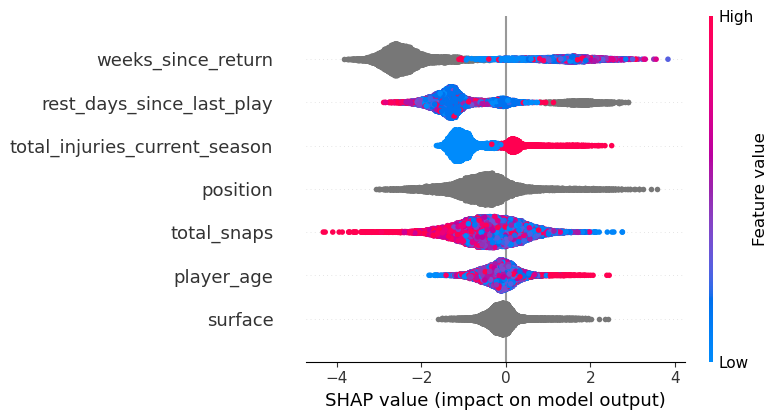

[2014 2015] 2016
AP: 0.08432328830375256


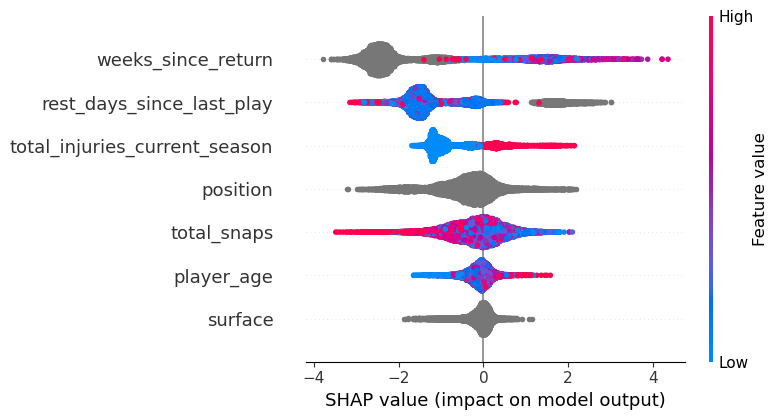

[2014 2015 2016] 2017
AP: 0.08239048134927081


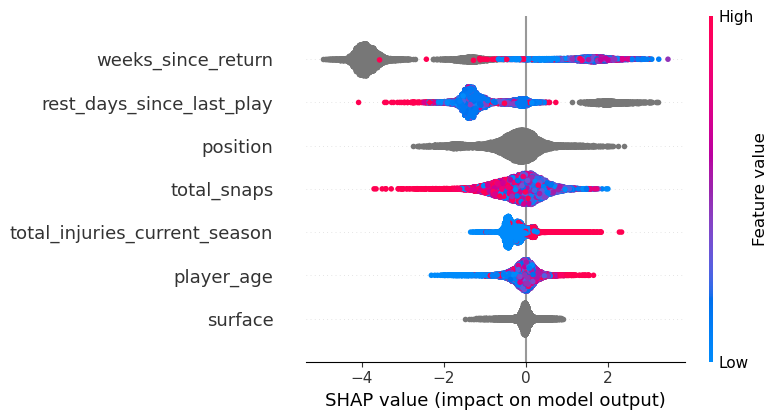

[2014 2015 2016 2017] 2018
AP: 0.08152032799755733


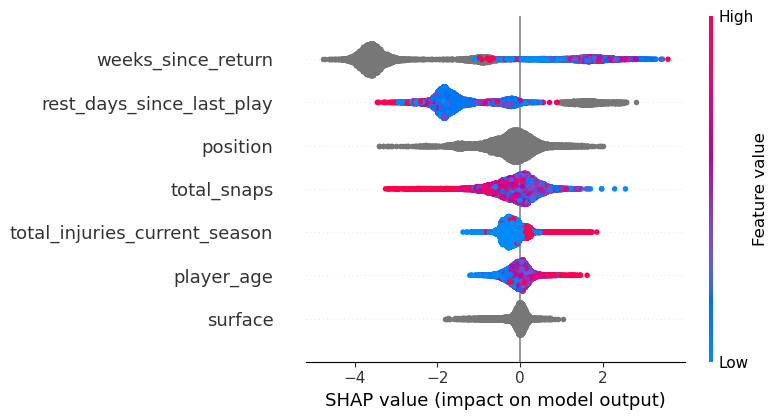

[2014 2015 2016 2017 2018] 2019
AP: 0.0778894146546797


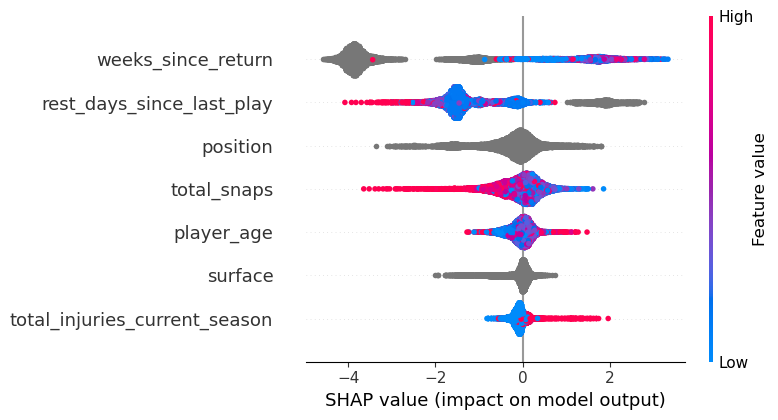

[2014 2015 2016 2017 2018 2019] 2020
AP: 0.08636033707989575


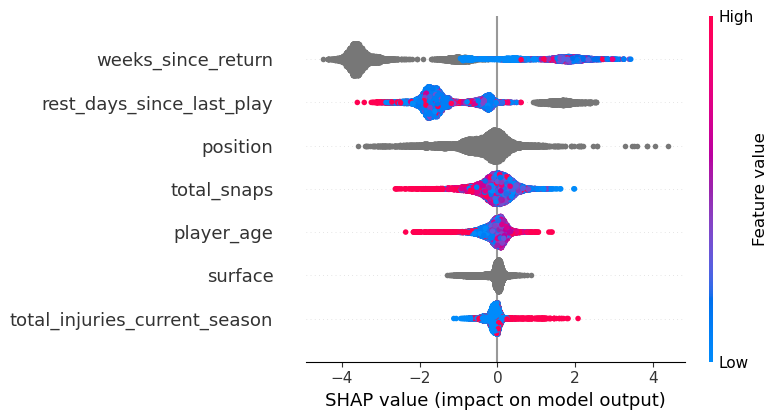

[2014 2015 2016 2017 2018 2019 2020] 2021
AP: 0.06863984551924976


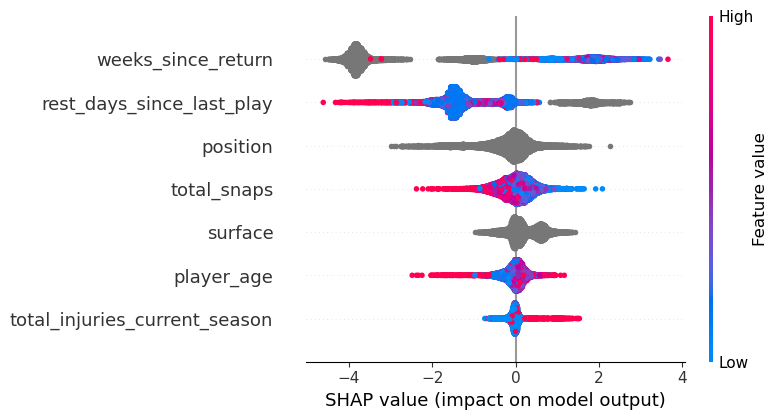

[2014 2015 2016 2017 2018 2019 2020 2021] 2022
AP: 0.06996510967055238


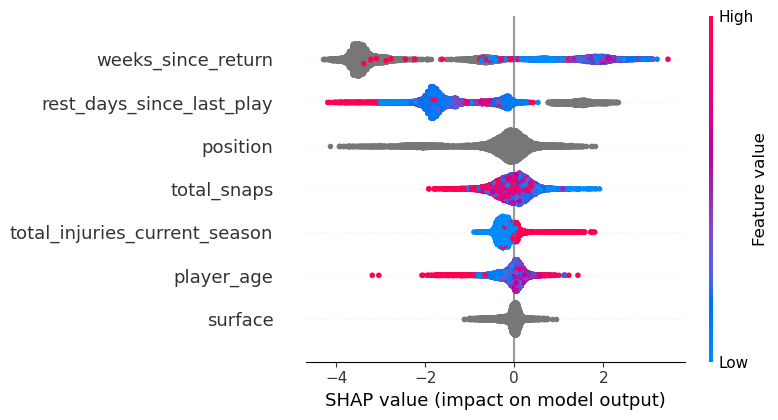

[2014 2015 2016 2017 2018 2019 2020 2021 2022] 2023
AP: 0.07151876097165542


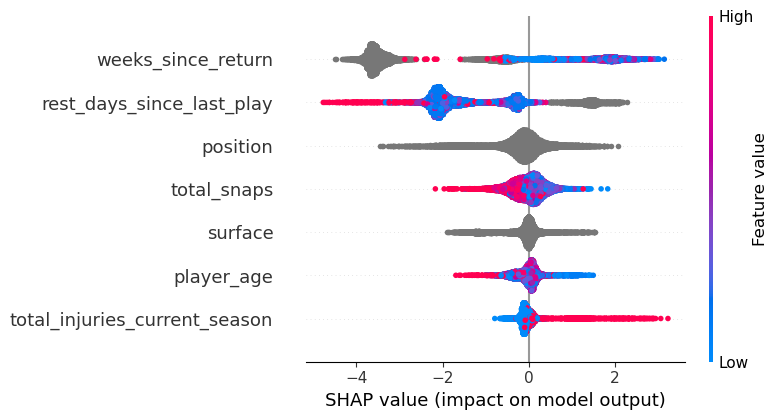

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 2024
AP: 0.0951907200959132


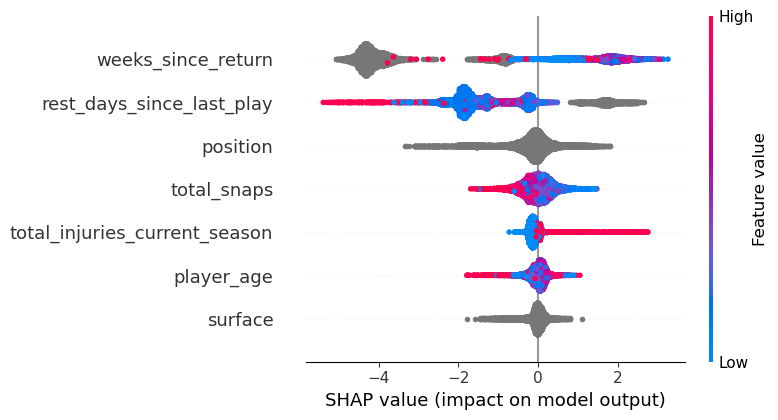

In [265]:
seasons = np.arange(2014, 2025)

for season in range(1, len(seasons)):
    test_season = seasons[season]
    train_seasons = seasons[:season]
    print(train_seasons, test_season)
    train_df = play_filtered.loc[play_filtered["season"].isin(train_seasons)]
    test_df = play_filtered.loc[play_filtered["season"] == test_season]
    model = xgb.XGBClassifier(
        n_estimators=100,
        objective="binary:logistic",
        enable_categorical=True,
        random_state=42,
    )
    X_train = train_df.drop(["reinjured_next_week", "season"], axis=1)
    y_train = train_df["reinjured_next_week"]
    X_test = test_df.drop(["reinjured_next_week", "season"], axis=1)
    y_test = test_df["reinjured_next_week"]
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"AP: {average_precision_score(y_test, y_prob)}")

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

In [ ]:
# can stack these across the folds and get average but basically they all show a similar pattern